2.506900162645096


C:\Users\Kevin\AppData\Local\Temp\ipykernel_12880\716746000.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='true_size', y='recalculated_sizes', data=df, palette='Set2')


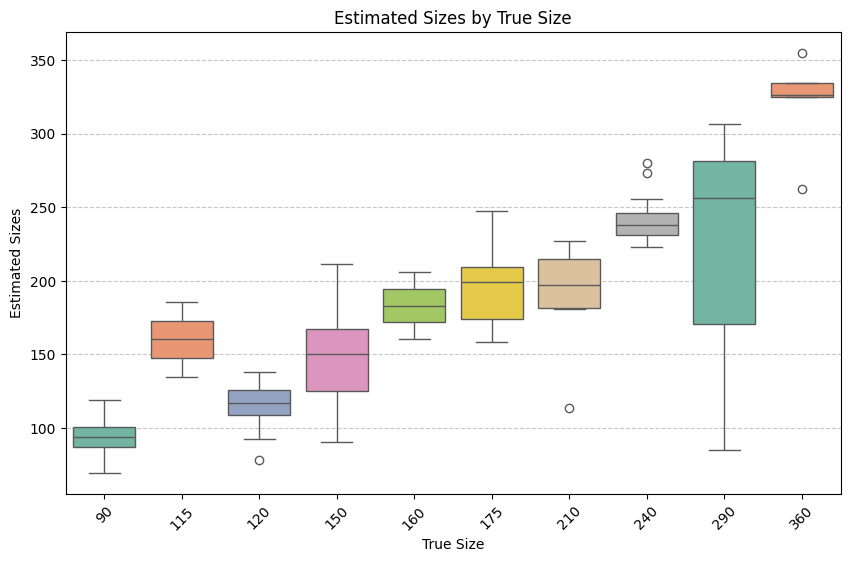

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import os

# creating a data frame
df = pd.read_table("C:/Users/Kevin/Desktop/Thesis/ThesisCode/DepthSensing/metric_depth/image_sizes.csv", delimiter =",")

df['true_size'] = df['image_name'].apply(lambda x: int(os.path.basename(os.path.dirname(x))))

df['estimated_size'] = df['estimated_size'].apply(lambda x: x * 100)
df['size_ratio'] = df['estimated_size'] / df['true_size']

df['recalculated_sizes'] = df['estimated_size'] / df['size_ratio'].mean()

print(df['size_ratio'].mean())

df

std_by_true_size = df.groupby('true_size')['recalculated_sizes'].std()

std_by_true_size

# Assuming you have a DataFrame df with columns 'true_size' and 'recalculated_sizes'

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='true_size', y='recalculated_sizes', data=df, palette='Set2')
plt.xlabel('True Size')
plt.ylabel('Estimated Sizes')
plt.title('Estimated Sizes by True Size')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()
